# carrega bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# carregar base de dados

/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

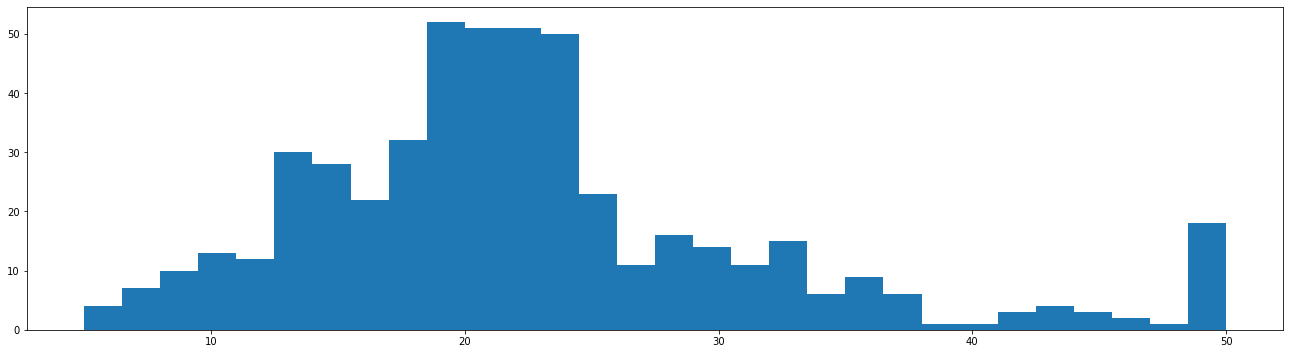

In [80]:
# carregando dados pela biblioteca do scikit-learn
X, y = load_boston(return_X_y=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)
fig, ax = plt.subplots(figsize=(18,5))
ax.hist(y, bins = 30)
fig.tight_layout(pad=1.0)

In [81]:
# define categories for the output
y_cat = []
for yi in y:
    if yi < 20:
        y_cat.append('cheap')
    elif yi < 35:
        y_cat.append('fair')
    else:
        y_cat.append('expensive')
# feature names
fn = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
# to visualize stats let's put numpy into dataframe format
dataset = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1),
                  columns=fn)
dataset['cat'] = y_cat

In [82]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,cat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0,fair
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6,fair
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7,fair
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4,fair
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2,expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4,fair
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6,fair
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9,fair
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0,fair


# visualizar dados

In [62]:
# tipos de colunas
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
cat         object
dtype: object

In [63]:
# resumo numérico dos dados (média, desvio padrão, mínimo, máximo)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [64]:
# número de exemplos em cada classe
dataset.groupby('cat').size()

cat
cheap        210
expensive     48
fair         248
dtype: int64

# analisar dados

In [65]:
# separar dados entre treino e teste
train, test = train_test_split(dataset, test_size = 0.4, random_state = 42)

In [66]:
# compara as bases de treino
print('Treino:')
print(train.describe())
print(train.groupby('cat').size())

Treino:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     3.345161   12.316832   11.020396    0.066007    0.552900    6.344677   
std      7.925900   23.717019    6.984761    0.248704    0.115472    0.733410   
min      0.009060    0.000000    1.210000    0.000000    0.385000    3.863000   
25%      0.078910    0.000000    4.930000    0.000000    0.448000    5.895500   
50%      0.251990    0.000000    9.690000    0.000000    0.538000    6.229000   
75%      3.043800   20.000000   18.100000    0.000000    0.627500    6.721000   
max     88.976200   95.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    67.994389    3.851676    9.330033  403.603960   18.241254  357.580330   
std     27.802673  

In [67]:
# compara as bases de treino
print('Test:')
print(test.describe())
print(test.groupby('cat').size())

Test:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  203.000000  203.000000  203.000000  203.000000  203.000000  203.000000   
mean     4.014084    9.940887   11.310493    0.073892    0.557374    6.195015   
std      9.527767   22.704275    6.683685    0.262241    0.116716    0.645388   
min      0.006320    0.000000    0.460000    0.000000    0.392000    3.561000   
25%      0.086855    0.000000    5.910000    0.000000    0.462000    5.873000   
50%      0.268380    0.000000    9.690000    0.000000    0.538000    6.174000   
75%      4.193600    0.000000   18.100000    0.000000    0.624000    6.477500   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  203.000000  203.000000  203.000000  203.000000  203.000000  203.000000   
mean    69.441379    3.710511    9.876847  415.152709   18.775369  355.321281   
std     28.705048    

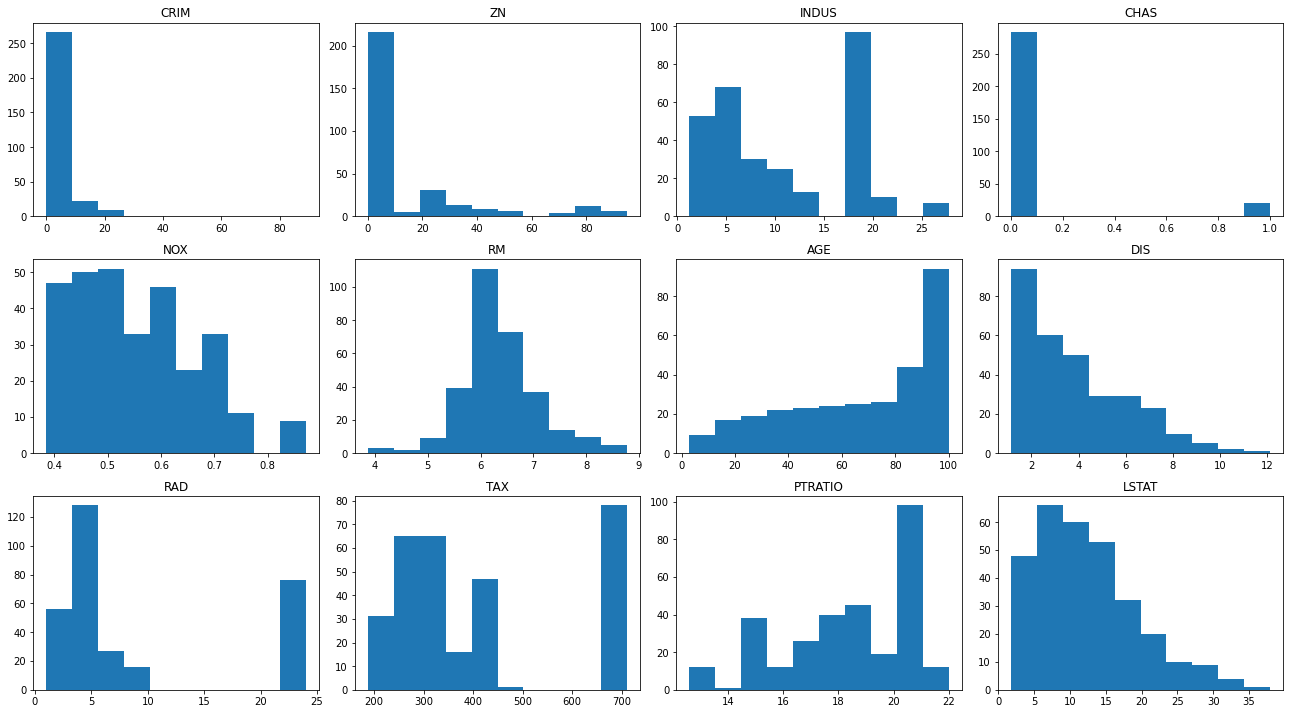

In [68]:
# histograms
n_bins = 10
fn = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']
k = 0
fig, axs = plt.subplots(3, 4, figsize=(18,10))
for i in range(3):
    for j in range(4):
        axs[i,j].hist(train[fn[k]], bins = n_bins)
        axs[i,j].set_title(fn[k])
        k += 1
# add some spacing between subplots
fig.tight_layout(pad=1.0)

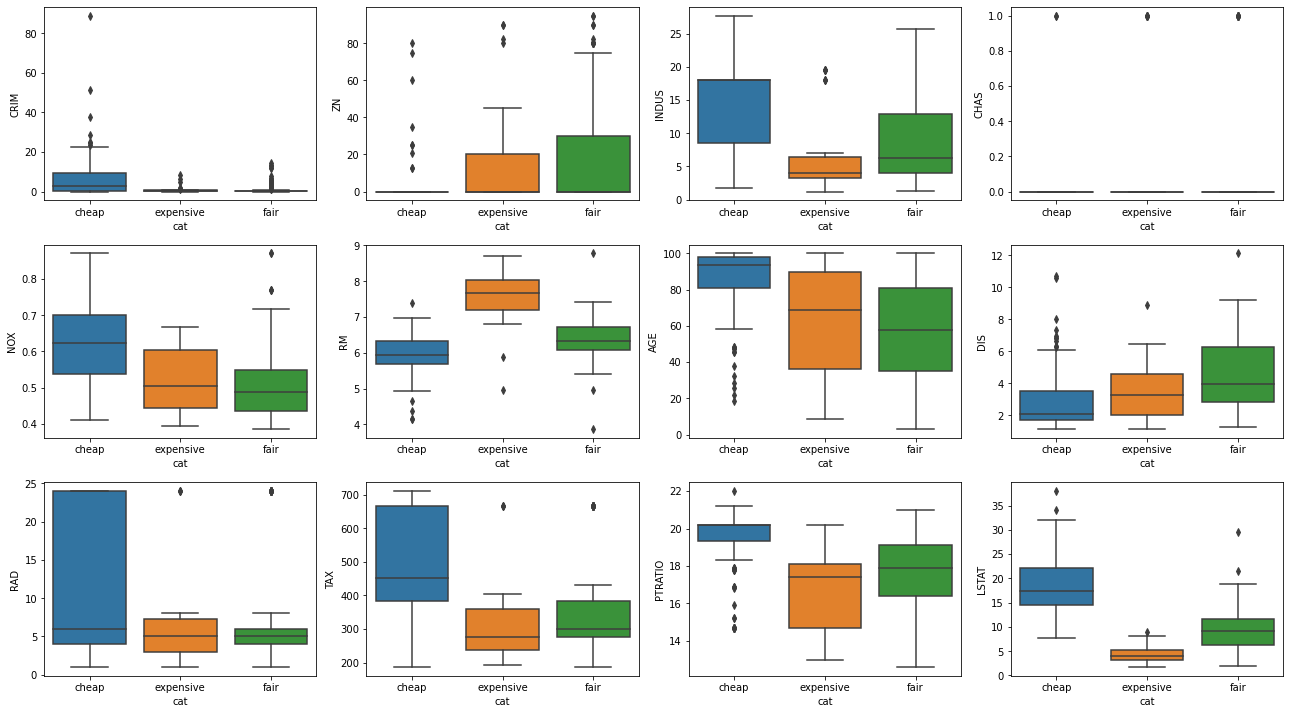

In [69]:
# boxplots using seaborn
k = 0
fig, axs = plt.subplots(3, 4, figsize=(18,10))
fn = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']
cn = ['cheap', 'expensive', 'fair']
for i in range(3):
    for j in range(4):
        sns.boxplot(x = 'cat', y = fn[k], data = train, order = cn, ax = axs[i,j])
        k += 1
# add some spacing between subplots
fig.tight_layout(pad=1.0)

/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

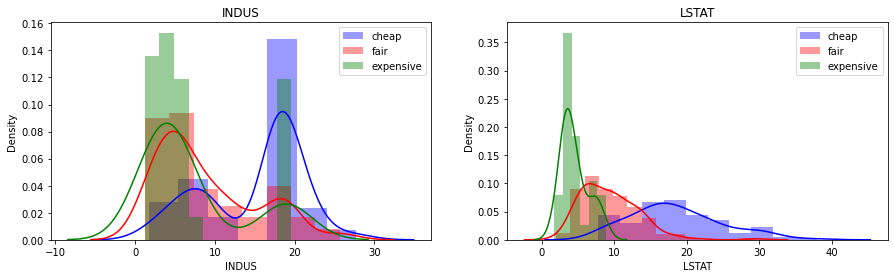

In [70]:
# histogram by categories
cheap_crim = train.loc[train.cat=='cheap', 'INDUS']
fair_crim = train.loc[train.cat=='fair', 'INDUS']
expensive_crim = train.loc[train.cat=='expensive', 'INDUS']
cheap_lstat = train.loc[train.cat=='cheap', 'LSTAT']
fair_lstat = train.loc[train.cat=='fair', 'LSTAT']
expensive_lstat = train.loc[train.cat=='expensive', 'LSTAT']

fig, axs = plt.subplots(1, 2)

# set figure size
fig.set_size_inches(15,4)
ax1 = sns.distplot(cheap_crim, color="blue", label="cheap", ax = axs[0])
ax1.set_title('INDUS')
ax1 = sns.distplot(fair_crim, color="red", label="fair", ax = axs[0])
ax1 = sns.distplot(expensive_crim, color="green", label="expensive", ax = axs[0])
ax1.legend()

ax2 = sns.distplot(cheap_lstat, color="blue", label="cheap", ax = axs[1])
ax2.set_title('LSTAT')
ax2 = sns.distplot(fair_lstat, color="red", label="fair", ax = axs[1])
ax2 = sns.distplot(expensive_lstat, color="green", label="expensive", ax = axs[1])
ax2.legend()

# treinamento

In [71]:
# separar entradas e saídas
X_train = train[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']]
y_train = train[['MEDV']]
X_test = test[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']]
y_test = test[['MEDV']]

In [72]:
# MODELO 1: regressão linear
mod_lr = LinearRegression()
mod_lr.fit(X_train, y_train)
y_train_hat = mod_lr.predict(X_train)
per = mod_lr.score(X_train,y_train)
print('Performance of Linear Regression in the training set:',"{:.3f}".format(per))

Performance of Linear Regression in the training set: 0.739


In [73]:
# MODELO 2: SVM com kernel linear
mod_svr = SVR(kernel='linear')
mod_svr.fit(X_train, y_train)
y_train_hat = mod_svr.predict(X_train)
per = mod_svr.score(X_train,y_train)
print('Performance of Linear SVM in the training set:',"{:.3f}".format(per))

/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance of Linear SVM in the training set: 0.706


In [74]:
# MODELO 3: árvore de decisão
mod_dt = DecisionTreeRegressor(max_depth=5, random_state = 1)
mod_dt.fit(X_train,y_train)
per = mod_dt.score(X_train, y_train)
print('Accuracy of decision tree classifier in the training set:',"{:.3f}".format(per))

Accuracy of decision tree classifier in the training set: 0.936


# teste dos modelos

Performance of Linear regression in the training set: 0.709


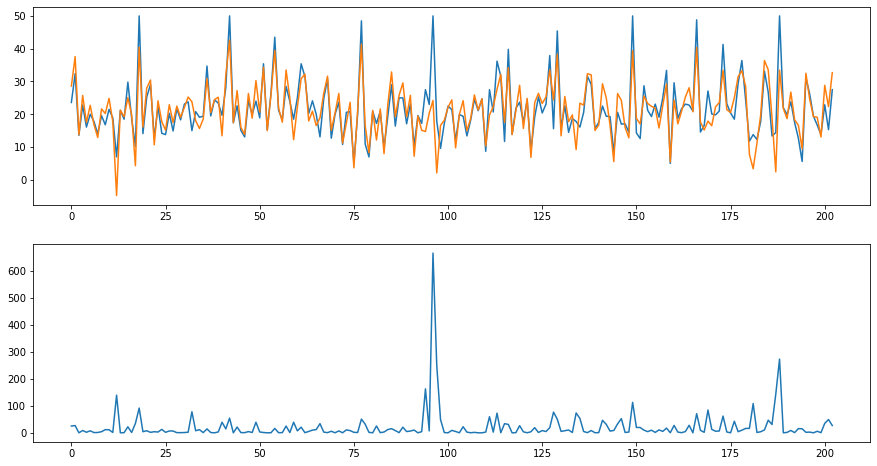

/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


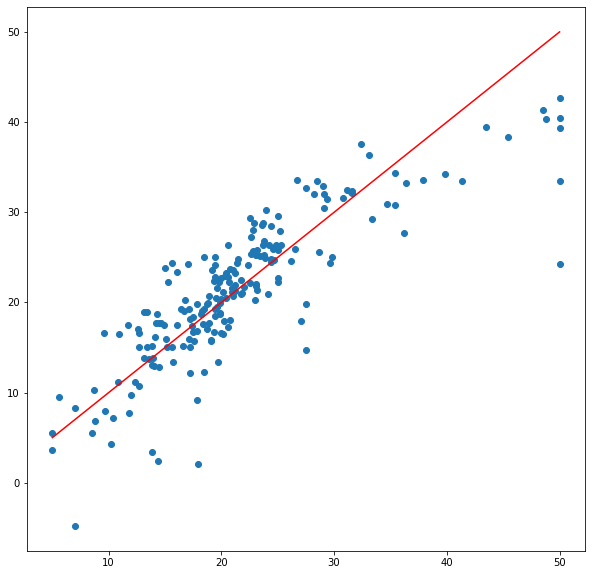

In [75]:
per = mod_lr.score(X_test, y_test)
print('Performance of Linear regression in the training set:',"{:.3f}".format(per))
y_test_hat = mod_lr.predict(X_test)
fig, axs = plt.subplots(2,1, figsize=(15,8))
xaxis = range(len(y_test))
axs[0].plot(xaxis, y_test)
axs[0].plot(xaxis, y_test_hat)
axs[1].plot(xaxis, np.square(y_test-y_test_hat))
plt.show()

l = np.linspace(np.min(y_test), np.max(y_test), len(y_test))
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, y_test_hat)
ax.plot(l, l, color='red')
plt.show()


Performance of Linear regression in the training set: 0.672


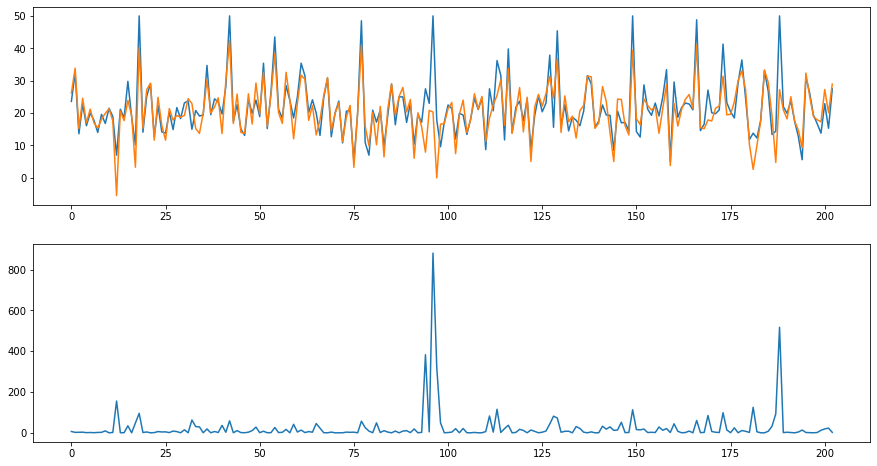

/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


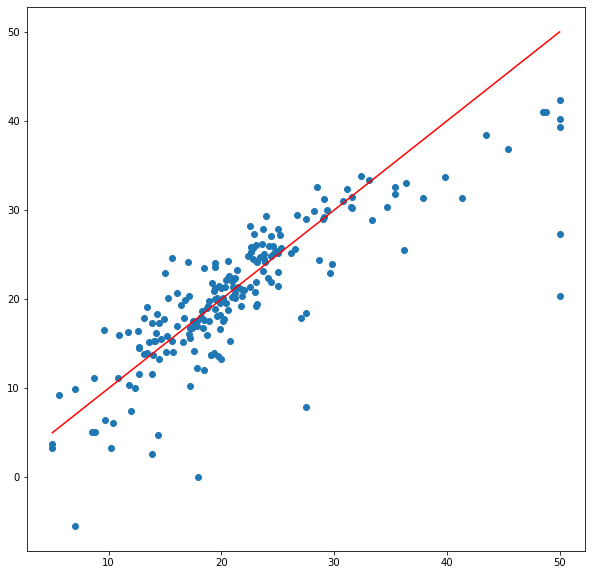

In [77]:
per = mod_svr.score(X_test, y_test)
print('Performance of Linear regression in the training set:',"{:.3f}".format(per))
y_test_hat = mod_svr.predict(X_test).reshape(-1,1)
fig, axs = plt.subplots(2,1, figsize=(15,8))
xaxis = range(len(y_test))
axs[0].plot(xaxis, y_test)
axs[0].plot(xaxis, y_test_hat)
axs[1].plot(xaxis, np.square(y_test-y_test_hat))
plt.show()

l = np.linspace(np.min(y_test), np.max(y_test), len(y_test))
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, y_test_hat)
ax.plot(l, l, color='red')
plt.show()

Performance of Linear regression in the training set: 0.749


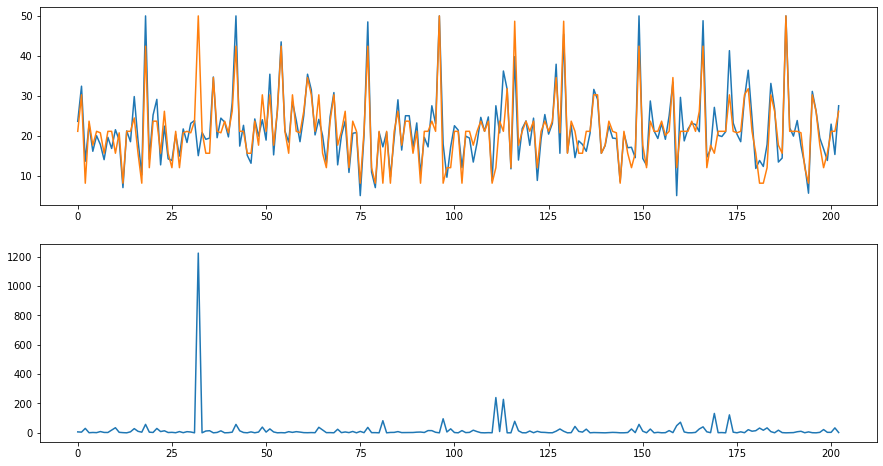

/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/numpy/core/fromnumeric.py:85: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


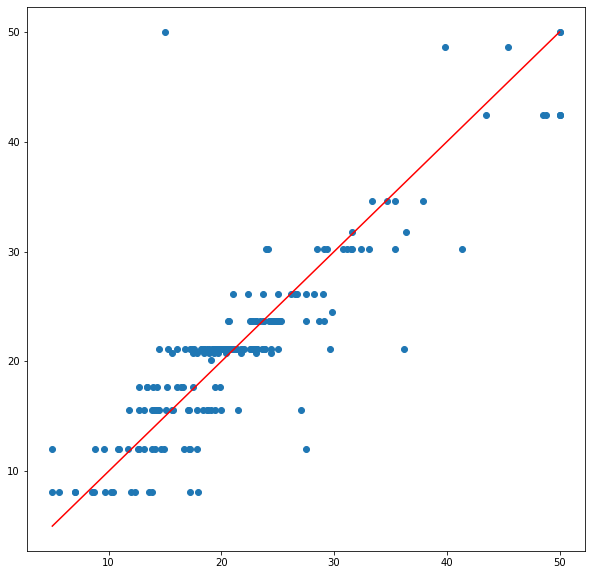

In [78]:
per = mod_dt.score(X_test, y_test)
print('Performance of Linear regression in the training set:',"{:.3f}".format(per))
y_test_hat = mod_dt.predict(X_test).reshape(-1,1)
fig, axs = plt.subplots(2,1, figsize=(15,8))
xaxis = range(len(y_test))
axs[0].plot(xaxis, y_test)
axs[0].plot(xaxis, y_test_hat)
axs[1].plot(xaxis, np.square(y_test-y_test_hat))
plt.show()

l = np.linspace(np.min(y_test), np.max(y_test), len(y_test))
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, y_test_hat)
ax.plot(l, l, color='red')
plt.show()

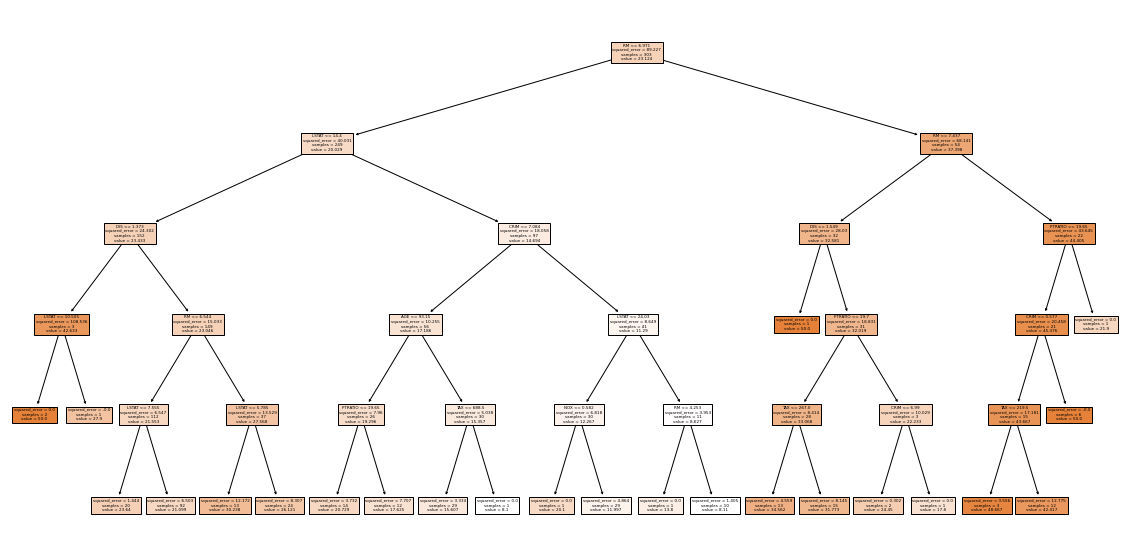

In [79]:
plt.figure(figsize = (20,10))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

# observando overfitting, underfitting e ajuste de hiperparâmetros

In [ ]:
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.datasets import load_iris
# carregando dados pela biblioteca do scikit-learn
X, y = load_iris(return_X_y=True)
#X=X_train.to_numpy()
#y = pd.Categorical(y_train).codes

In [ ]:
# observando a importância do tamanho da base de dados
sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
# MODELO 1
train_sizes, train_scores_model1, valid_scores_model1 = learning_curve(
    mod_lr,
    X, y,
    train_sizes=sizes,
    cv=5)
# MODELO 2
train_sizes, train_scores_model2, valid_scores_model2 = learning_curve(
    mod_svm,
    X, y,
    train_sizes=sizes,
    cv=5)
# MODELO 3
train_sizes, train_scores_model3, valid_scores_model3 = learning_curve(
    mod_dt,
    X, y,
    train_sizes=sizes,
    cv=5)

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(sizes,np.mean(train_scores_model1, axis=1))
ax.plot(sizes,np.mean(valid_scores_model1, axis=1))
ax.plot(sizes,np.mean(train_scores_model2, axis=1))
ax.plot(sizes,np.mean(valid_scores_model2, axis=1))
ax.plot(sizes,np.mean(train_scores_model3, axis=1))
ax.plot(sizes,np.mean(valid_scores_model3, axis=1))
plt.legend(['train_scores_model1',
            'valid_scores_model1',
            'train_scores_model2',
            'valid_scores_model2',
            'train_scores_model3',
            'valid_scores_model3'])
plt.grid()
plt.xlabel('Data amount (%)')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# observando a importância do ajuste dos hiperparâmetros
train_scores_model1, valid_scores_model1 = validation_curve(
    mod_lr,
    X, y,
    param_name="C",
    param_range=np.linspace(0.1, 1, 10),
    cv=5)
train_scores_model2, valid_scores_model2 = validation_curve(
    mod_svm,
    X, y,
    param_name="C",
    param_range=np.linspace(0.1, 1, 10),
    cv=5)
train_scores_model3, valid_scores_model3 = validation_curve(
    mod_dt,
    X, y,
    param_name="min_weight_fraction_leaf",
    param_range=np.linspace(0, 0.1, 10),
    cv=5)

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(np.mean(train_scores_model1, axis=1))
ax.plot(np.mean(valid_scores_model1, axis=1))
ax.plot(np.mean(train_scores_model2, axis=1))
ax.plot(np.mean(valid_scores_model2, axis=1))
ax.plot(np.mean(train_scores_model3, axis=1))
ax.plot(np.mean(valid_scores_model3, axis=1))
plt.legend(['train_scores_model1',
            'valid_scores_model1',
            'train_scores_model2',
            'valid_scores_model2',
            'train_scores_model3',
            'valid_scores_model3'])
plt.grid()
plt.xlabel('Hyperparameter')
plt.ylabel('Accuracy')
plt.show()